In [73]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

## Part (a)

Text(0.5, 1.0, 'Time Series of z (AR(1) process)')

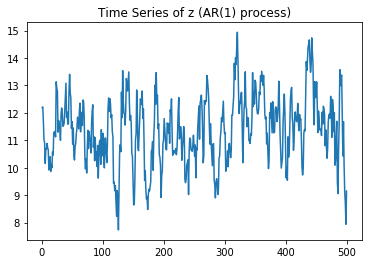

In [74]:
## Setting the parameters
T = 500
sigma = 0.7
rho = 0.85
mu = 11.4

unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T, random_state=25)
eps_vec = sts.norm.ppf(unif_vec, loc=0, scale=sigma)

z_t = np.zeros(T+1)
z_t[0] = mu

for i in range(1, T+1):
    z_t[i] = rho * z_t[i-1] + (1 - rho) * mu + eps_vec[i-1]
    
## Plotting z_t
fig, ax = plt.subplots()
ax.plot(np.arange(1,T+1), z_t[1:T+1])
ax.set_title('Time Series of z (AR(1) process)')

## Part (b)

In [75]:
z_vals = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 5)
print(z_vals)

[ 9.3  10.35 11.4  12.45 13.5 ]


## Part (c)

In [76]:
## Define the cutoffs z_cuts 
z_cuts = 0.5 * z_vals[:-1] + 0.5 * z_vals[1:]

## Create the matrix P_hat
P_hat = np.zeros((5,5),dtype='float')


def classification(series, z_cuts):
    # transform continuous variable to discrete bins
    
    discrete = np.zeros_like(series)
    
    for i in range(len(series)):
        if series[i] <= z_cuts[0]:
            discrete[i] = 1
        elif series[i] <= z_cuts[1]:
            discrete[i] = 2
        elif series[i] <= z_cuts[2]:
            discrete[i] = 3
        elif series[i] <= z_cuts[3]:
            discrete[i] = 4
        else:
            discrete[i] = 5
    return discrete

z_bins = classification(z_t, z_cuts)

for i in range(5):
    for j in range(5):
        for k in range(len(z_bins)-1):
            if z_bins[k] == i+1 and z_bins[k+1] == j+1:
                P_hat[i,j] += 1

for i in range(5):
    Sum = P_hat[i,:].sum()
    P_hat[i,:] = P_hat[i,:]/Sum

print('P_hat =', P_hat)


P_hat = [[0.69387755 0.26530612 0.04081633 0.         0.        ]
 [0.09166667 0.55       0.325      0.03333333 0.        ]
 [0.0304878  0.2195122  0.48170732 0.23170732 0.03658537]
 [0.         0.04201681 0.34453782 0.50420168 0.1092437 ]
 [0.         0.         0.04166667 0.35416667 0.60416667]]


## Part (d)

In [77]:
## First way to solve part (d)
# The relevant matrix is P^3 because the relevant is the difference between t+3 and t
P_hat_3 = P_hat @ P_hat @ P_hat
P_hat_3

print(P_hat_3)

[[0.38698062 0.35117976 0.20187607 0.05215206 0.00781149]
 [0.13330611 0.33422489 0.34246891 0.15572665 0.03427345]
 [0.0729931  0.24438892 0.35601426 0.24601683 0.0805869 ]
 [0.03186549 0.16404864 0.3464362  0.32291403 0.13473564]
 [0.0081836  0.06716875 0.24389354 0.38586873 0.29488537]]


In [78]:
## The probability of z_t+3 being in bin 5 given that z_t is in bien 3 today 
## corresponds to the element 2,4 of the P_hat_3 matrix

print('The probability is equal to', P_hat_3[2,4])

The probability is equal to 0.08058689966619678


In [79]:
## Second wat to solve part (d), using the hint given in the pdf
import numpy.linalg as LA

z_t3 = np.array([0,0,1,0,0])
z_t5 = np.dot(LA.matrix_power(P_hat.T, 3), z_t3)
z_t5

array([0.0729931 , 0.24438892, 0.35601426, 0.24601683, 0.0805869 ])

In [80]:
## The probability of z_t+3 being in bin 5 given that z_t is in bien 3 today 
## corresponds to the element 1,5 of the z_t5 vector

print('The probability is equal to', z_t5[4])

The probability is equal to 0.08058689966619678


## Part (e)

I will find the stationary distribution by iterating the current distribution until it is no longer changing.
I will take as an initial value the vector [0, 0, 1, 0, 0] as suggested in part (d)

In [81]:
X_0 = np.array([0,0,1,0,0])
X_stat = np.dot(LA.matrix_power(P_hat.T, 100), X_0)
print(X_stat)

[0.1045698  0.24154031 0.32373493 0.23529555 0.09485941]


## Part (f)

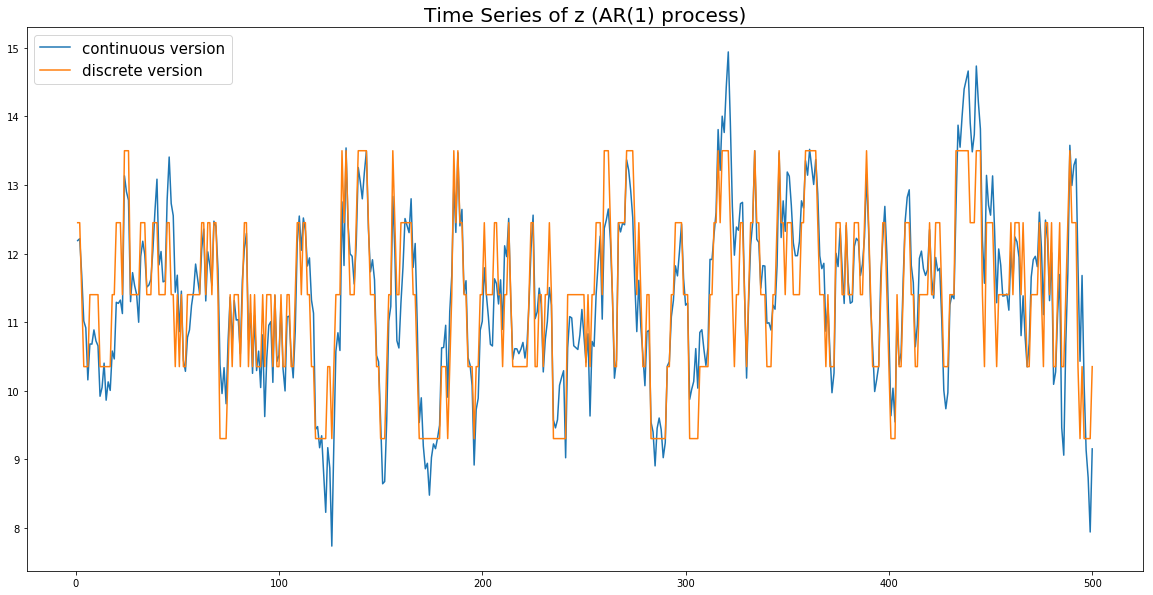

In [82]:
def classification2(P):
    
    P_new = np.zeros_like(P)
    P_new[:,0] = P[:,0]
    for i in range(1,P.shape[1]):
        P_new[:,i] = P_new[:,i-1] + P[:,i]
    return P_new

new_z_t = np.zeros(T+1)
new_z_t_idx = np.zeros(T+1, dtype = 'int')
new_z_t[0] = z_vals[2]
new_z_t_idx[0] = 2
Phat_sum = classification2(P_hat)

for i in range(T):
    cdf_t = Phat_sum[new_z_t_idx[i],:]
    new_z_t_idx[i+1] = classification(np.array([unif_vec[i]]), cdf_t)[0]-1
    new_z_t[i+1] = z_vals[new_z_t_idx[i+1]]
    
    
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(np.arange(1,T+1), z_t[1:T+1], label = 'continuous version')
ax.plot(np.arange(1,T+1), new_z_t[1:T+1], label = 'discrete version')
ax.set_title('Time Series of z (AR(1) process)', fontsize=20)
ax.legend(fontsize=15)